<a href="https://colab.research.google.com/github/abidur0177/Natural_Language_Processing/blob/main/Text_generation_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project I will feed the neural network a corpus from Hamlet of Shakespeare and generate text based on the corpus

### Import the necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Bidirectional, LSTM, Embedding, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Building the word vocabulary

In [41]:
# Define the text
text = "There's a divinity that shapes our ends, \nRough-hew them how we will. \nWhat a piece of work is a man! \nhow noble in reason! how infinite in faculty! \nin form and moving how express and admirable! \nin action how like an angel! in apprehension how like a god! \nthe beauty of the world! the paragon of animals! \nAnd yet, to me, what is this quintessence of dust? \nMan delights not me; no, nor woman neither. \nWhat's Hecuba to him, or he to Hecuba, \nThat he should weep for her? \nUse every man after his desert, and who should 'scape whipping? \nTo be, or not to be: that is the question: \nWhether 'tis nobler in the mind to suffer \nThe slings and arrows of outrageous fortune, \nOr to take arms against a sea of troubles \nAnd by opposing end them? To die: to sleep; \nNo more; and by a sleep to say we end \nThe heart-ache and the thousand natural shocks \nThat flesh is heir to, 'tis a consummation \nDevoutly to be wish'd. To die, to sleep; \nTo sleep: perchance to dream: ay, there's the rub; \nFor in that sleep of death what dreams may come \nWhen we have shuffled off this mortal coil, \nMust give us pause: there's the respect \nThat makes calamity of so long life; \nFor who would bear the whips and scorns of time, \nThe oppressor's wrong, the proud man's contumely, \nThe pangs of despised love, the law's delay, \nThe insolence of office and the spurns \nThat patient merit of the unworthy takes, \nWhen he himself might his quietus make \nWith a bare bodkin? who would fardels bear, \nTo grunt and sweat under a weary life, \nBut that the dread of something after death, \nThe undiscover'd country from whose bourn \nNo traveller returns, puzzles the will \nAnd makes us rather bear those ills we have \nThan fly to others that we know not of? \nThus conscience does make cowards of us all; \nAnd thus the native hue of resolution \nIs sicklied o'er with the pale cast of thought, \nAnd enterprises of great pith and moment \nWith this regard their currents turn awry, \nAnd lose the name of action.--Soft you now! \nThe fair Ophelia! Nymph, in thy orisons \nBe all my sins remember'd. \nGood night, sweet prince, \nAnd flights of angels sing thee to thy rest! \nThou know'st 'tis common; all that lives must die, \nPassing through nature to eternity. \nTo-morrow, and to-morrow, and to-morrow, \nCreeps in this petty pace from day to day, \nTo the last syllable of recorded time; \nAnd all our yesterdays have lighted fools \nThe way to dusty death. Out, out, brief candle! \nLife's but a walking shadow, a poor player \nThat struts and frets his hour upon the stage \nAnd then is heard no more: it is a tale \nTold by an idiot, full of sound and fury, \nSignifying nothing. \nThere is a willow grows aslant a brook, \nThat shows his hoar leaves in the glassy stream; \nThere with fantastic garlands did she come \nOf crow-flowers, nettles, daisies, and long purples \nThat liberal shepherds give a grosser name, \nBut our cold maids do dead men's fingers call them: \nThere, on the pendent boughs her coronet weeds \nClambering to hang, an envious sliver broke; \nWhen down her weedy trophies and herself \nFell in the weeping brook. Her clothes spread wide; \nAnd, mermaid-like, awhile they bore her up: \nWhich time she chanted snatches of old tunes; \nAs one incapable of her own distress, \nOr like a creature native and indued \nUnto that element: but long it could not be \nTill that her garments, heavy with their drink, \nPull'd the poor wretch from her melodious lay \nTo muddy death. \nAlas, poor Yorick! I knew him, Horatio: \na fellow of infinite jest, of most excellent fancy: \nhe hath borne me on his back a thousand times; \nand now, how abhorred in my imagination it is! \nmy gorge rims at it. Here hung those lips that I have kiss'd \nI know not how oft. Where be your gibes now? \nyour gambols? your songs? your flashes of merriment, \nthat were wont to set the table on a roar? \nNot one now, to mock your own grinning? quite chap-fallen? \nNow get you to my lady's chamber, and tell her, let \nher paint an inch thick, to this favour she must \ncome; make her laugh at that. Prithee, Horatio, tell \nme one thing. \nMy lord, they say five moons were seen to-night; \nFour fixed, and the fifth did whirl about \nThe other four in wondrous motion. \nMy lord, I think I saw them not. \nHoratio says 'tis but our fantasy, \nAnd will not let belief take hold of him \nTouching this dreaded sight, twice seen of us: \nTherefore I have entreated him along \nWith us to watch the minutes of this night; \nThat if again this apparition come, \nHe may approve our eyes and speak to it. \nTush, tush, 'twill not appear. \nSit down awhile; \nAnd let us once again assail your ears, \nThat are so fortified against our story \nWhat we have two nights seen. \nWell, sit we down, \nAnd let us hear Bernardo speak of this. \nLast night of all, \nWhen yond same star that's westward from the pole \nHad made his course to illume that part of heaven \nWhere now it burns, Marcellus and myself, \nThe bell then beating"


# Get the corpus
corpus = text.lower().split("\n")

corpus

["there's a divinity that shapes our ends, ",
 'rough-hew them how we will. ',
 'what a piece of work is a man! ',
 'how noble in reason! how infinite in faculty! ',
 'in form and moving how express and admirable! ',
 'in action how like an angel! in apprehension how like a god! ',
 'the beauty of the world! the paragon of animals! ',
 'and yet, to me, what is this quintessence of dust? ',
 'man delights not me; no, nor woman neither. ',
 "what's hecuba to him, or he to hecuba, ",
 'that he should weep for her? ',
 "use every man after his desert, and who should 'scape whipping? ",
 'to be, or not to be: that is the question: ',
 "whether 'tis nobler in the mind to suffer ",
 'the slings and arrows of outrageous fortune, ',
 'or to take arms against a sea of troubles ',
 'and by opposing end them? to die: to sleep; ',
 'no more; and by a sleep to say we end ',
 'the heart-ache and the thousand natural shocks ',
 "that flesh is heir to, 'tis a consummation ",
 "devoutly to be wish'd. to

In [42]:
# Initiate the tokenizer instance
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Get the word index
word_index = tokenizer.word_index
print(word_index)

# Get the length of the word index
total_words = len(word_index) + 1
print(total_words)

{'the': 1, 'to': 2, 'and': 3, 'of': 4, 'that': 5, 'a': 6, 'in': 7, 'her': 8, 'is': 9, 'this': 10, 'not': 11, 'how': 12, 'we': 13, 'us': 14, 'our': 15, 'his': 16, 'be': 17, 'have': 18, 'with': 19, 'now': 20, 'my': 21, 'it': 22, 'i': 23, 'your': 24, 'he': 25, 'sleep': 26, 'but': 27, 'all': 28, 'them': 29, 'what': 30, 'like': 31, 'an': 32, 'me': 33, 'no': 34, 'him': 35, 'or': 36, "'tis": 37, 'death': 38, 'come': 39, 'when': 40, 'from': 41, 'night': 42, 'let': 43, "there's": 44, 'will': 45, 'man': 46, 'for': 47, 'who': 48, 'by': 49, 'die': 50, 'must': 51, 'long': 52, 'bear': 53, 'time': 54, 'make': 55, 'morrow': 56, 'poor': 57, 'there': 58, 'she': 59, 'on': 60, 'down': 61, 'one': 62, 'horatio': 63, 'seen': 64, 'infinite': 65, 'action': 66, 'hecuba': 67, 'should': 68, 'after': 69, 'take': 70, 'against': 71, 'end': 72, 'more': 73, 'say': 74, 'thousand': 75, 'may': 76, 'give': 77, 'makes': 78, 'so': 79, 'life': 80, 'would': 81, 'those': 82, 'know': 83, 'thus': 84, 'native': 85, 'their': 86, '

### Preprocessing the dataset

In [43]:
# First lets see the sequences with the tokens
sequences = tokenizer.texts_to_sequences(corpus)
sequences

[[44, 6, 109, 5, 110, 15, 111],
 [112, 113, 29, 12, 13, 45],
 [30, 6, 114, 4, 115, 9, 6, 46],
 [12, 116, 7, 117, 12, 65, 7, 118],
 [7, 119, 3, 120, 12, 121, 3, 122],
 [7, 66, 12, 31, 32, 123, 7, 124, 12, 31, 6, 125],
 [1, 126, 4, 1, 127, 1, 128, 4, 129],
 [3, 130, 2, 33, 30, 9, 10, 131, 4, 132],
 [46, 133, 11, 33, 34, 134, 135, 136],
 [137, 67, 2, 35, 36, 25, 2, 67],
 [5, 25, 68, 138, 47, 8],
 [139, 140, 46, 69, 16, 141, 3, 48, 68, 142, 143],
 [2, 17, 36, 11, 2, 17, 5, 9, 1, 144],
 [145, 37, 146, 7, 1, 147, 2, 148],
 [1, 149, 3, 150, 4, 151, 152],
 [36, 2, 70, 153, 71, 6, 154, 4, 155],
 [3, 49, 156, 72, 29, 2, 50, 2, 26],
 [34, 73, 3, 49, 6, 26, 2, 74, 13, 72],
 [1, 157, 158, 3, 1, 75, 159, 160],
 [5, 161, 9, 162, 2, 37, 6, 163],
 [164, 2, 17, 165, 2, 50, 2, 26],
 [2, 26, 166, 2, 167, 168, 44, 1, 169],
 [47, 7, 5, 26, 4, 38, 30, 170, 76, 39],
 [40, 13, 18, 171, 172, 10, 173, 174],
 [51, 77, 14, 175, 44, 1, 176],
 [5, 78, 177, 4, 79, 52, 80],
 [47, 48, 81, 53, 1, 178, 3, 179, 4, 54],
 [

In [44]:
# Initialize the sequence list
input_sequence = []

# Loop over every line of the corpus
for line in corpus:

  # Get the first element of each tokenized sequence of the list
  token_list = tokenizer.texts_to_sequences([line])[0]

  # Loop over each tokenized sequence and get the input sequence
  for i in range(1, len(token_list)):
    n_grams = token_list[:i+1]
    input_sequence.append(n_grams)

# See the input sequence
input_sequence

[[44, 6],
 [44, 6, 109],
 [44, 6, 109, 5],
 [44, 6, 109, 5, 110],
 [44, 6, 109, 5, 110, 15],
 [44, 6, 109, 5, 110, 15, 111],
 [112, 113],
 [112, 113, 29],
 [112, 113, 29, 12],
 [112, 113, 29, 12, 13],
 [112, 113, 29, 12, 13, 45],
 [30, 6],
 [30, 6, 114],
 [30, 6, 114, 4],
 [30, 6, 114, 4, 115],
 [30, 6, 114, 4, 115, 9],
 [30, 6, 114, 4, 115, 9, 6],
 [30, 6, 114, 4, 115, 9, 6, 46],
 [12, 116],
 [12, 116, 7],
 [12, 116, 7, 117],
 [12, 116, 7, 117, 12],
 [12, 116, 7, 117, 12, 65],
 [12, 116, 7, 117, 12, 65, 7],
 [12, 116, 7, 117, 12, 65, 7, 118],
 [7, 119],
 [7, 119, 3],
 [7, 119, 3, 120],
 [7, 119, 3, 120, 12],
 [7, 119, 3, 120, 12, 121],
 [7, 119, 3, 120, 12, 121, 3],
 [7, 119, 3, 120, 12, 121, 3, 122],
 [7, 66],
 [7, 66, 12],
 [7, 66, 12, 31],
 [7, 66, 12, 31, 32],
 [7, 66, 12, 31, 32, 123],
 [7, 66, 12, 31, 32, 123, 7],
 [7, 66, 12, 31, 32, 123, 7, 124],
 [7, 66, 12, 31, 32, 123, 7, 124, 12],
 [7, 66, 12, 31, 32, 123, 7, 124, 12, 31],
 [7, 66, 12, 31, 32, 123, 7, 124, 12, 31, 6],
 [7,

In [46]:
# Get the maximum sequence length for padding
max_seq_len = max([len(x) for x in input_sequence])

# Pad the input sequence
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_seq_len, padding='pre'))
input_sequence.shape

(786, 13)

In [47]:
# Get the inputs and labels
inputs, labels = input_sequence[:,:-1], input_sequence[:,-1]

# Convert the labels into one-hot arrays
labels = keras.utils.to_categorical(labels, num_classes=total_words)
labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Build and compile the model

In [48]:
# Build the model
model = Sequential([

          # The input shape is the max_seq_len - 1 because the last element of each sequence is takes off as the label of the input data
          Embedding(total_words, 32, input_length=max_seq_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 12, 32)            14816     
                                                                 
 bidirectional_4 (Bidirecti  (None, 40)                8480      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 463)               18983     
                                                                 
Total params: 42279 (165.15 KB)
Trainable params: 42279 (165.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model and plot the accuracy

In [49]:
# Define the number of epochs
num_epoch = 500
history = model.fit(inputs, labels, epochs=num_epoch)

Epoch 1/500
25/25 [==============================] - 4s 11ms/step - loss: 6.1327 - accuracy: 0.0140
Epoch 2/500
25/25 [==============================] - 0s 10ms/step - loss: 6.0680 - accuracy: 0.0267
Epoch 3/500
25/25 [==============================] - 0s 11ms/step - loss: 5.8138 - accuracy: 0.0267
Epoch 4/500
25/25 [==============================] - 0s 12ms/step - loss: 5.6457 - accuracy: 0.0382
Epoch 5/500
25/25 [==============================] - 0s 11ms/step - loss: 5.6064 - accuracy: 0.0420
Epoch 6/500
25/25 [==============================] - 0s 11ms/step - loss: 5.5855 - accuracy: 0.0407
Epoch 7/500
25/25 [==============================] - 0s 10ms/step - loss: 5.5663 - accuracy: 0.0420
Epoch 8/500
25/25 [==============================] - 0s 10ms/step - loss: 5.5370 - accuracy: 0.0420
Epoch 9/500
25/25 [==============================] - 0s 10ms/step - loss: 5.4874 - accuracy: 0.0471
Epoch 10/500
25/25 [==============================] - 0s 10ms/step - loss: 5.4345 - accuracy: 0.0560

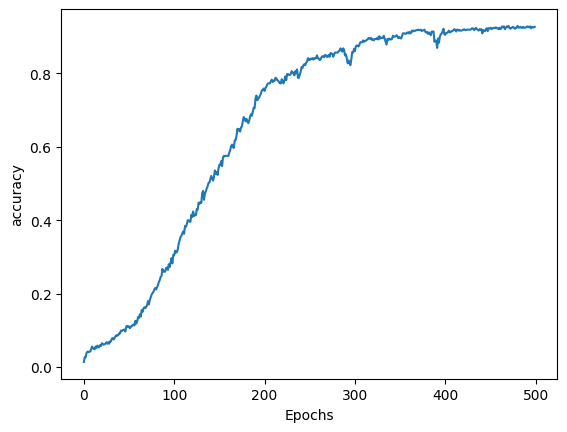

In [50]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

### Predict the next 50 words

In [51]:
# Define seed text
seed_text = "there's a divinity"

# Define total words to predict
next_words = 50

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 20ms/step
there's a divinity that shapes our ends of merriment moons like a currents hold take dream last last hew them the poor might undiscover'd weeds native minutes 'tis puzzles element morrow know not of be should nor wont his returns them every lord them every lord i apprehension a suffer apprehension we tush
